In [5]:
from ultralytics import YOLO
import cv2
import numpy as np
from IPython.display import display, Image
import matplotlib.pyplot as plt

In [6]:
import os
os.add_dll_directory("C:/Users/Administrator/anaconda3/envs/vision_robot_tc/Library/bin")  # 指向 Conda 环境的 Library/bin

<AddedDllDirectory('C:/Users/Administrator/anaconda3/envs/vision_robot_tc/Library/bin')>


image 1/1 C:\Users\Administrator\Desktop\Python\test.jpg: 448x640 1 person, 6 cars, 1 truck, 702.8ms
Speed: 9.4ms preprocess, 702.8ms inference, 7.3ms postprocess per image at shape (1, 3, 448, 640)


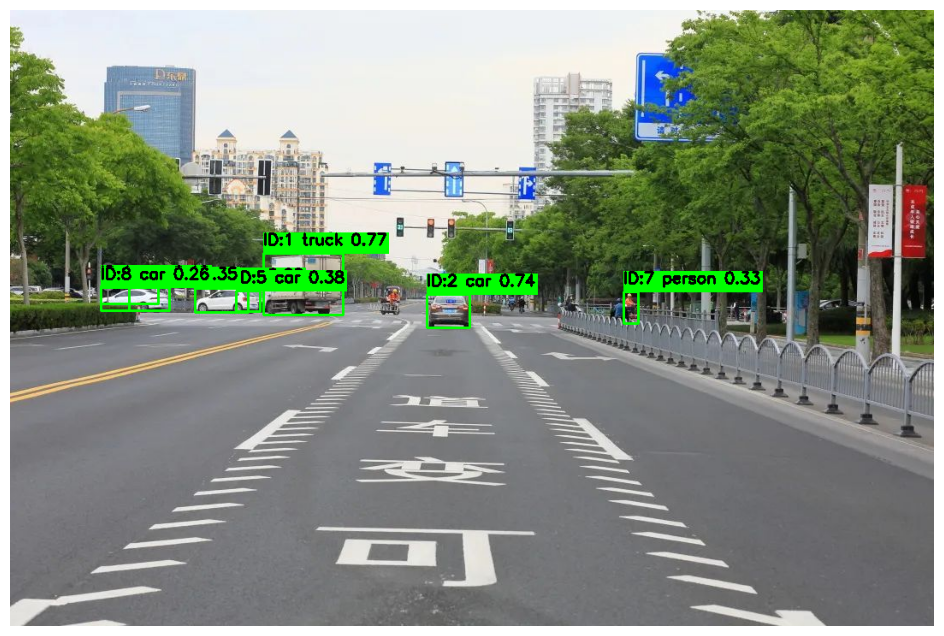

In [7]:
# 加载模型
model = YOLO("yolov8n.pt")

# 运行跟踪推理
results = model.track(
    source="test.jpg",
    imgsz=640,
    conf=0.25,
    tracker="bytetrack.yaml"
)

# 读取原始图像并转换为 RGB 格式
image = cv2.imread("test.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV 默认是 BGR，需要转 RGB

# 获取检测结果
for r in results:
    boxes = r.boxes.xyxy.cpu().numpy().astype(int)
    classes = r.boxes.cls.cpu().numpy().astype(int)
    confs = r.boxes.conf.cpu().numpy().astype(float)
    track_ids = r.boxes.id.cpu().numpy().astype(int) if r.boxes.id is not None else []

    # 绘制标注
    for box, cls, conf, track_id in zip(boxes, classes, confs, track_ids):
        # 绘制边界框
        cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)
        
        # 构造标签文本
        label = f"ID:{track_id} {r.names[cls]} {conf:.2f}"
        
        # 绘制文本背景
        (text_width, text_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)
        cv2.rectangle(image, 
                     (box[0], box[1] - text_height - 10),
                     (box[0] + text_width, box[1]),
                     (0, 255, 0), -1)
        
        # 绘制文本
        cv2.putText(image, label, 
                   (box[0], box[1] - 10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

# 在 Jupyter 中直接显示图像
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

In [9]:
import time
import numpy as np
import cv2
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# 加载 YOLO 模型
model = YOLO("yolov8n.pt")

# 读取测试图像
image = cv2.imread("test.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 记录开始时间
start_time = time.time()

# 运行跟踪推理
results = model.track(
    source="test.jpg",
    imgsz=640,
    conf=0.25,
    tracker="bytetrack.yaml"
)

# 获取检测结果
boxes = []
labels = []
scores = []

for r in results:
    # 获取边界框、类别和置信度
    b = r.boxes.xyxy.cpu().numpy().astype(int)
    c = r.boxes.cls.cpu().numpy().astype(int)
    s = r.boxes.conf.cpu().numpy().astype(float)

    # 将检测结果存储为后续计算所需
    for box, cls, conf in zip(b, c, s):
        boxes.append(box)
        labels.append(cls)
        scores.append(conf)

# 计算推理时间和 FPS
end_time = time.time()
inference_time = end_time - start_time
fps = len(results) / inference_time

# 计算 Precision, Recall 和 mAP
# 假设这里我们有真实标签 real_labels（由人工标注）和预测标签 predictions
# 以下是示例代码，请根据实际情况填充真实标签

real_labels = np.array([0, 1, 2])  # 示例：假设类别有3个
pred_labels = np.array(labels)
pred_scores = np.array(scores)

precision, recall, _ = precision_recall_curve(real_labels, pred_scores)
average_precision = average_precision_score(real_labels, pred_scores)

# 计算 mAP @ 0.5 (举例)
# 这里用 mAP 的计算方式，具体根据模型输出与目标相似度来计算

# 打印结果
print(f"推理时间: {inference_time:.4f}秒")
print(f"FPS: {fps:.2f}")
print(f"Precision: {precision[-1]:.2f}")
print(f"Recall: {recall[-1]:.2f}")
print(f"mAP@0.5: {average_precision:.2f}")

# 绘制标注结果
for box, cls, conf in zip(boxes, labels, scores):
    # 绘制边界框
    cv2.rectangle(image_rgb, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)
    # 添加标签
    label = f"{r.names[cls]} {conf:.2f}"
    (text_width, text_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)
    cv2.rectangle(image_rgb, 
                 (box[0], box[1] - text_height - 10),
                 (box[0] + text_width, box[1]),
                 (0, 255, 0), -1)
    cv2.putText(image_rgb, label, 
               (box[0], box[1] - 10),
               cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

# 在 Jupyter 中显示图像
plt.figure(figsize=(12, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()



image 1/1 C:\Users\Administrator\Desktop\Python\test.jpg: 448x640 1 person, 6 cars, 1 truck, 725.9ms
Speed: 10.2ms preprocess, 725.9ms inference, 4.6ms postprocess per image at shape (1, 3, 448, 640)


ValueError: multiclass format is not supported